## [CIFAR100](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.CIFAR100('./data', download=True)

Files already downloaded and verified


In [4]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.cifar.CIFAR100'>


In [5]:
print(len(dataset))

50000


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(data.mode, data.width, data.height)

RGB 32 32


In [9]:
print(type(target))

<class 'int'>


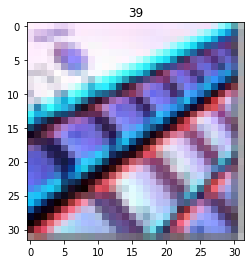

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.CIFAR100('./data', transform = ToTensor)

In [12]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])


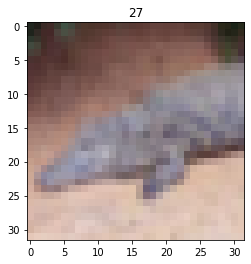

In [13]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [14]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])


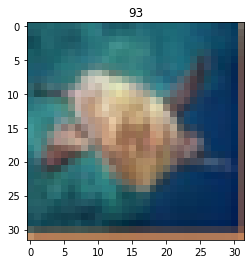

In [15]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [16]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 50000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 50000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 50]
Total number of data: 50000


In [17]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [18]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomRotation(10),
                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                      ])
compose_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])


train_data = torchvision.datasets.CIFAR100(root='./data/', train='True', transform=compose_train, download=True)
test_data  = torchvision.datasets.CIFAR100(root='./data/', train='False', transform=compose_test, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [19]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 50000
test sets: 50000


In [20]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [21]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    nn.init.kaiming_normal_(layers[0].weight)
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

In [22]:
class CIFAR100Model(nn.Module):
    def __init__(self, output_size):
        super(CIFAR100Model, self).__init__()

        self.output_size = output_size
        self.conv1 = conv_block(3, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.fc = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, self.output_size))
        

    def forward(self, x):
        output = self.conv1(x)
        output = self.conv2(output)
        output = self.res1(output) + output
        output = self.conv3(output)
        output = self.conv4(output)
        output = self.res2(output) + output
        output = self.fc(output)
        value = torch.max(output, 1)[1]

        return output, value        


In [23]:
model = CIFAR100Model(100).to(device)

In [24]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 32, 32])
tensor([[-2.8034e+00, -1.0653e+00, -5.5585e+00,  2.5108e+00, -2.8876e+00,
         -1.3787e+00,  2.5491e-01,  3.1294e+00, -4.8471e-01, -1.3818e+00,
         -5.2287e+00, -6.5803e-01,  3.2765e-01, -1.3803e+00,  3.3123e+00,
          1.8319e+00,  3.5299e+00, -1.1089e+00, -6.5634e-01,  5.4326e-01,
          9.2266e-02,  3.0178e+00, -1.3428e+00,  1.5184e+00,  4.4273e+00,
          6.4551e+00, -5.8766e-01,  5.3038e-02, -1.1039e+00,  9.1805e-01,
          4.2764e+00,  1.0586e+00,  4.7542e+00, -1.2358e+00,  3.1416e-01,
         -2.0679e+00,  2.8234e+00, -2.2953e+00,  3.0678e+00,  1.1131e+00,
          2.8129e+00,  1.2830e+00,  2.4361e+00,  4.0268e+00, -2.4932e+00,
          8.7261e-01, -2.2019e+00, -1.1868e+00, -2.5978e+00,  6.9715e+00,
         -1.7677e+00,  1.0859e-01,  2.7313e+00, -3.4202e+00, -2.2095e+00,
          4.4911e-01, -3.3112e+00, -1.6285e+00,  3.1450e+00,  6.6734e+00,
          9.3831e-01,  1.7418e+00, -4.1853e+00, -1.1913e+00,  7.9861e-01,
         -

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [25]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [26]:
model = CIFAR100Model(100).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 35 # 35회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    if (epoch + 1) % 5 != 0:
        print('epoch {}th training loss: {}'.format(
                epoch + 1, train_loss / n_train
            ))
    else:        
        model.eval()
        n_test = 0
        test_loss = 0
        correct = 0
        total = 0
        for test_data, test_target in test_loader:
            test_data = test_data.to(device)
            test_target = test_target.to(device)
            y_pred, idx_pred = model(test_data)
            del test_data
            loss = criterion(y_pred, test_target).sum()
            test_loss += loss.data.cpu().numpy()
            n_test += 1
            total += len(test_target)
            correct += (idx_pred == test_target).sum()

        accuracy = correct * 100 / total
        print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
                epoch + 1, train_loss / n_train, test_loss / n_test,
                accuracy
            ))
        list_training_loss.append(train_loss / n_train)
        list_test_loss.append(test_loss / n_test)

epoch 1th training loss: 6.347719030380249
epoch 2th training loss: 4.555794973373413
epoch 3th training loss: 4.29480936050415
epoch 4th training loss: 3.905596904754639
epoch 5th training loss: 3.5691336250305175 test loss: 3.331098966598511, accuracy: 19.510000228881836
epoch 6th training loss: 3.2633945322036744
epoch 7th training loss: 2.9720463705062867
epoch 8th training loss: 2.7298765659332274
epoch 9th training loss: 2.486022963523865
epoch 10th training loss: 2.281942048072815 test loss: 2.10245644569397, accuracy: 44.40999984741211
epoch 11th training loss: 2.1112801122665403
epoch 12th training loss: 1.9558633494377136
epoch 13th training loss: 1.817983989715576
epoch 14th training loss: 1.6995433235168458
epoch 15th training loss: 1.5995302081108094 test loss: 1.4178851699829103, accuracy: 60.39799880981445
epoch 16th training loss: 1.5165240240097047
epoch 17th training loss: 1.4121600103378296
epoch 18th training loss: 1.3322738981246949
epoch 19th training loss: 1.2575

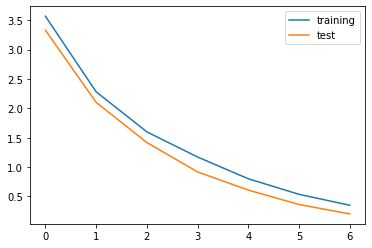

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()